In [15]:
import tensorflow as tf
import numpy as np

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [17]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [25]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # input_shape=[1] es que es un vector de un solo elemento
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1]) # input_shape=[1] es que es un vector de un solo elemento
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\edgar\miniforge3\envs\deep_learning_python3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [28]:
print("Comenzando entrenamiento...")
historia = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


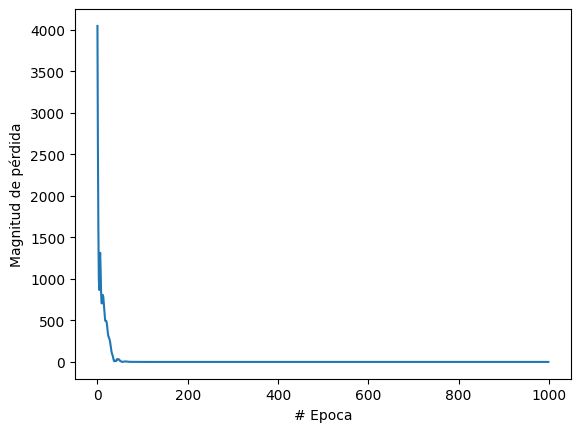

In [29]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")  
plt.plot(historia.history["loss"])

In [32]:
print("Hagamos una predicción")
#resultado = modelo.predict([100.0])
resultado = modelo.predict(np.array([100.0]))  # Convertimos a array
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
El resultado es [[211.74744]] fahrenheit


In [33]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.02471031,  0.74093485, -0.34158182]], dtype=float32), array([-2.843501 ,  3.745911 ,  0.5377409], dtype=float32)]
[array([[-0.09651267, -1.8209062 ,  0.11144023],
       [ 1.1549888 ,  0.1552528 , -1.2014052 ],
       [ 0.7114138 , -0.5650831 , -0.47571805]], dtype=float32), array([ 3.5749605,  3.0967636, -3.388966 ], dtype=float32)]
[array([[ 1.2735245],
       [ 1.007026 ],
       [-1.0424802]], dtype=float32), array([3.6193688], dtype=float32)]
